### Name: KVS SUMANTH GUPTHA
### Reg No: 20BCE7363

# Problem Statement: House Price Prediction

# Description:
House price prediction is a common problem in the real estate industry and involves predicting the selling price of a house based on various features and attributes. The problem is typically approached as a regression problem, where the target variable is the price of the house, and the features are various attributes of the house.

The features used in house price prediction can include both quantitative and categorical variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to main road, and various amenities such as a garage and other factors that may influence the value of the property.

Accurate predictions can help agents and appraisers price homes correctly, while homeowners can use the predictions to set a reasonable asking price for their properties. Accurate house price prediction can also be useful for buyers who are looking to make informed decisions about purchasing a property and obtaining a fair price for their investment.

# Attribute Information:
Name - Description

1- Price-Prices of the houses

2- Area- Area of the houses

3- Bedrooms- No of house bedrooms

4- Bathrooms- No of bathrooms
.
5- Stories- No of house stories

6- Main Road- Weather connected to Main road.

7- Guestroom-Weather has a guest room.

8- Basement-Weather has a basement

9- Hot water heating- Weather has a hot water heater

10-Airconditioning-Weather has a air conditioner

11-Parking- No of house parking

12-Furnishing Status-Furnishing status of house

## Building a Regression Model
1.Download the dataset: Dataset

2.Load the dataset into the tool.

3.Perform Below Visualizations.


*   Univariate Analysis
*   Bi-Variate Analysis
*   Multi-Variate Analysis
4.Perform descriptive statistics on the dataset.

5.Check for Missing values and deal with them.

6.Find the outliers and replace them outliers

7.Check for Categorical columns and perform encoding.

8.Split the data into dependent and independent variables.

9.Scale the independent variables

10.Split the data into training and testing

11.Build the Model

12.Train the Model

13.Test the Model

14.Measure the performance using Metrics.


## Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the dataset into the tool

In [4]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [5]:
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


### 3.Perform Below Visualizations.
*   Univariate Analysis
*   Bi-Variate Analysis
*   Multi-Variate Analysis

Univariate Analysis

Distribution Plot

<ipython-input-7-aea4d2af08eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'], color = 'b')


<Axes: xlabel='price', ylabel='Density'>

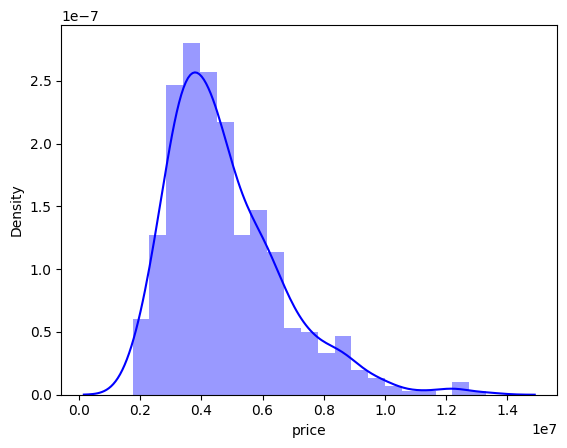

In [7]:
sns.distplot(data['price'], color = 'b')

Box Plot

<Axes: >

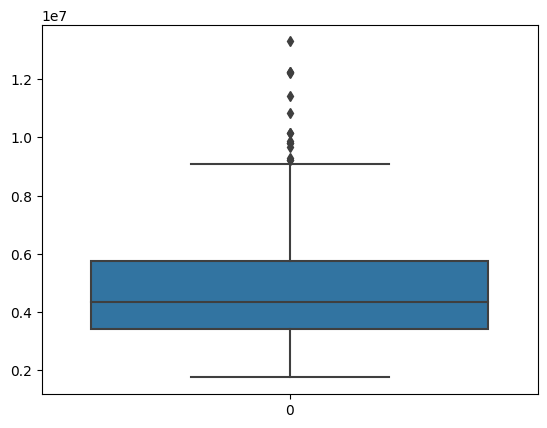

In [8]:
sns.boxplot(data['price'])

Scatter Plot

<Axes: ylabel='price'>

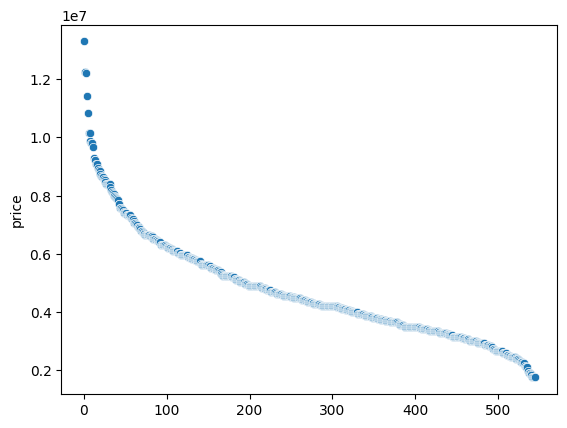

In [9]:
sns.scatterplot(data['price'])

Joint Plot

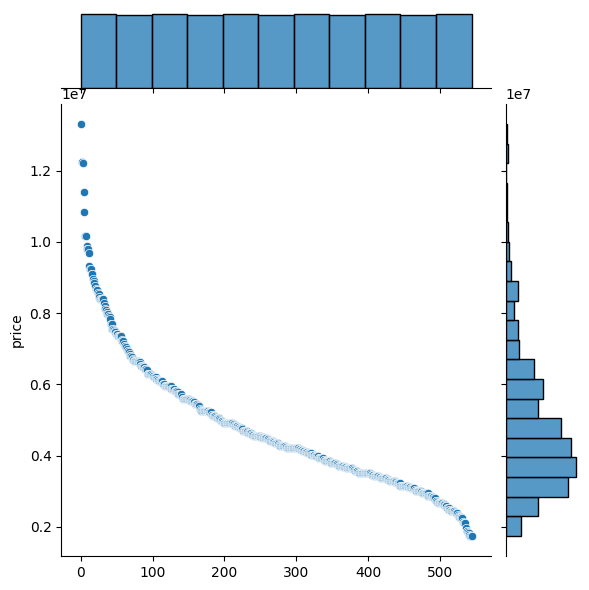

In [10]:
sns.jointplot(data['price'])

Bar Plot

<Axes: >

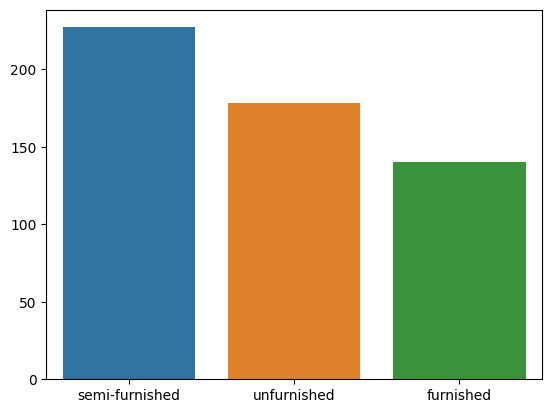

In [11]:
x = data.furnishingstatus.value_counts()
sns.barplot(x=x.index, y=x.values)

Pie Plot

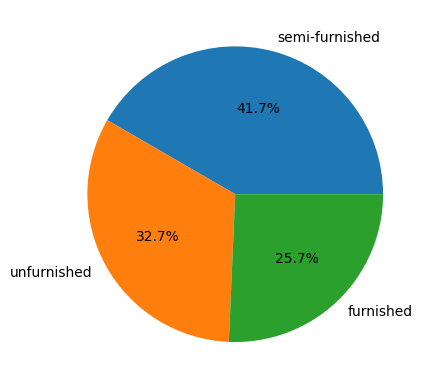

In [12]:
x = data['furnishingstatus'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

Bivariate Analysis

Bar Plot

<Axes: xlabel='furnishingstatus', ylabel='price'>

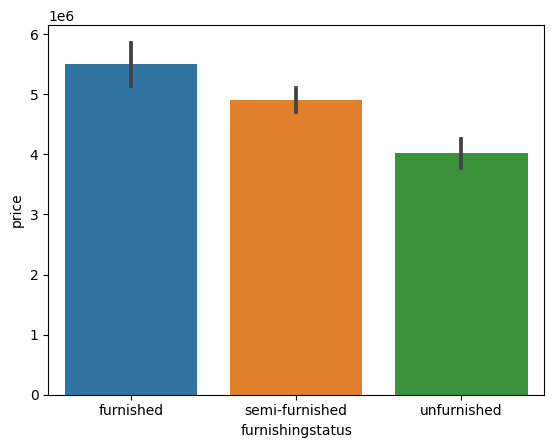

In [13]:
sns.barplot(x=data.furnishingstatus, y=data.price)

Pair Plot

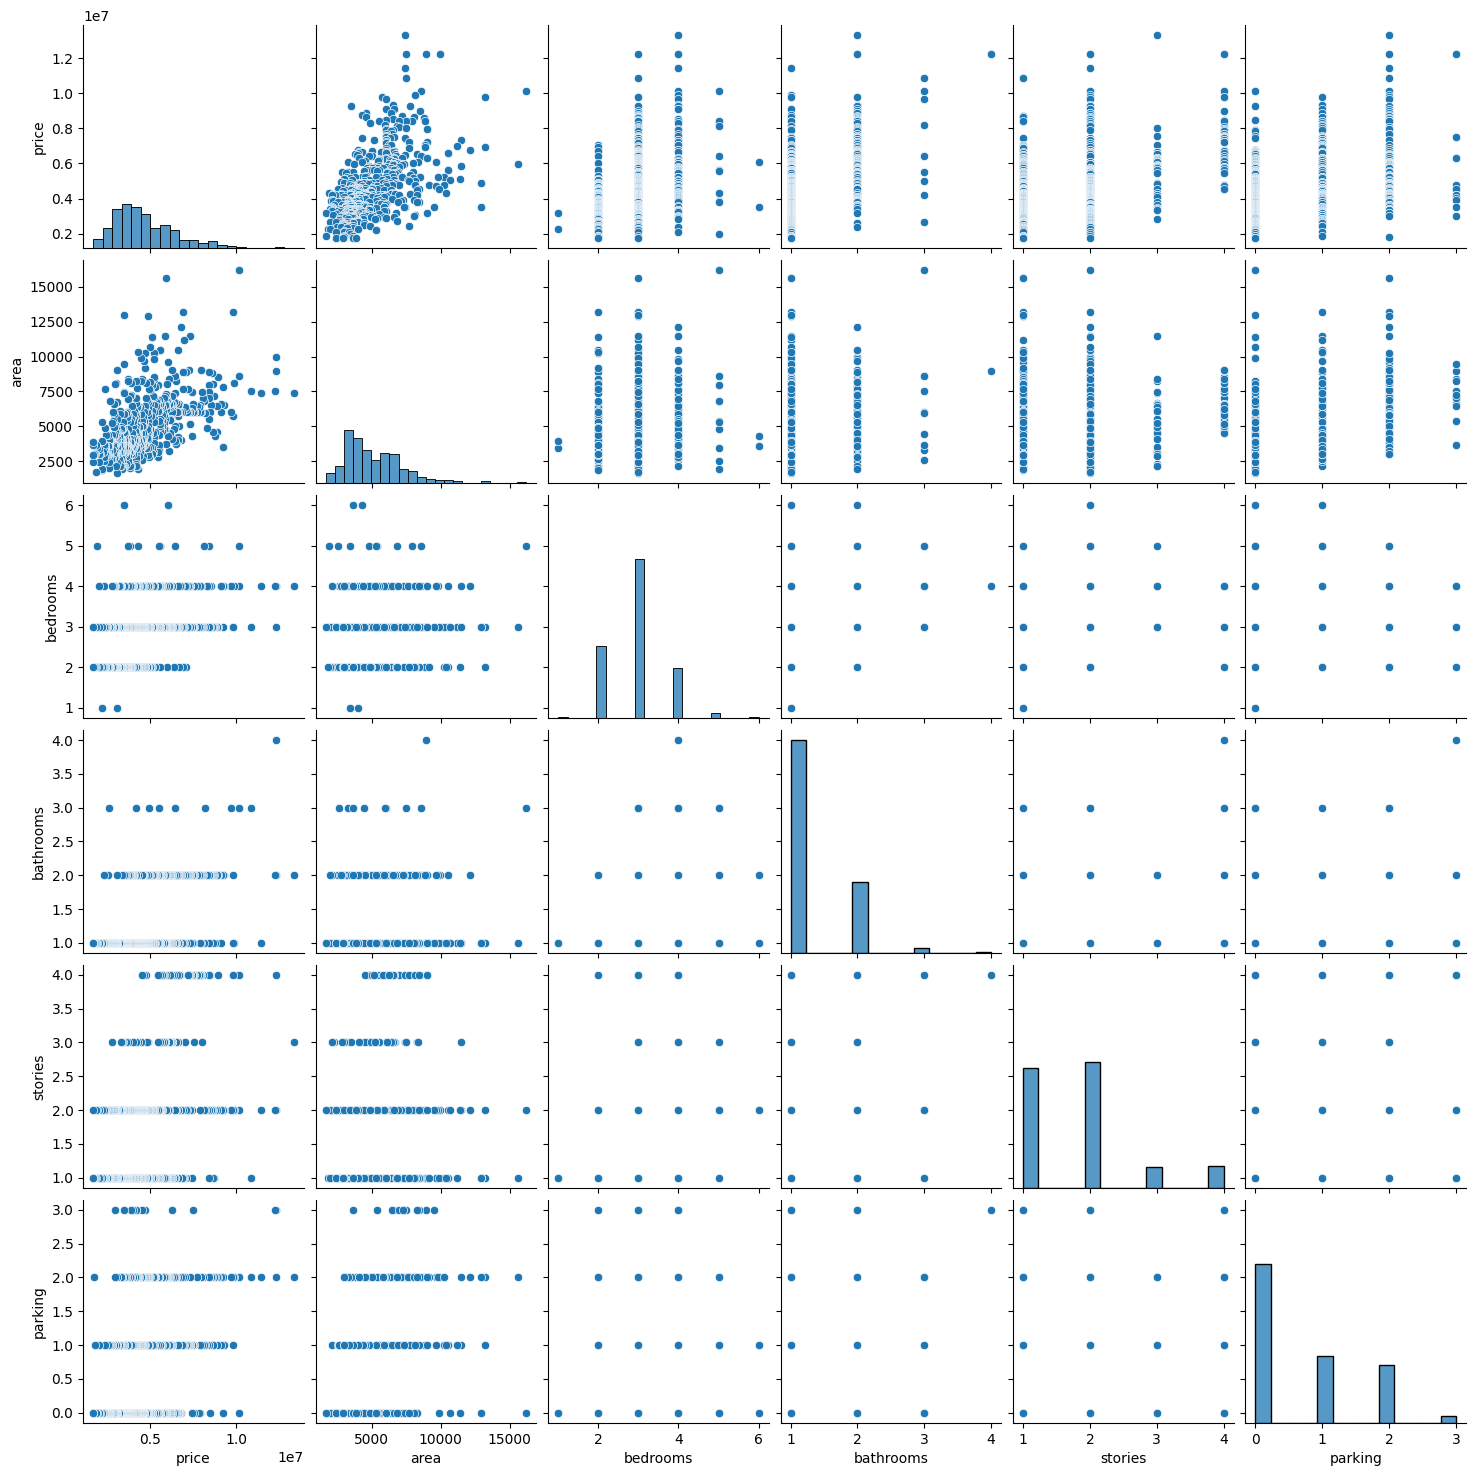

In [14]:
sns.pairplot(data)

Multivariate Analysis

<ipython-input-15-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

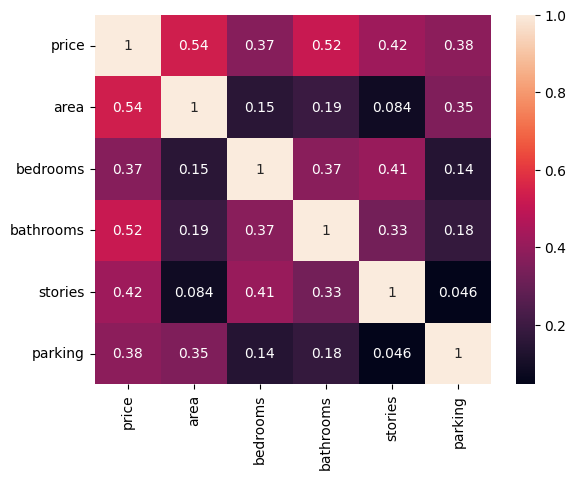

In [15]:
sns.heatmap(data.corr(), annot=True)

### 4. Perform descriptive statistics on the dataset.

       

Measure of central tendency - Mean, Median and Mode

In [16]:
data.mean()

<ipython-input-16-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [17]:
data.median()

<ipython-input-17-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [18]:
data.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Measure of variability:

Kurtosis

In [19]:
data.kurt()

<ipython-input-19-de7992f92dad>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

Range

In [20]:
data.max()

price                  13300000
area                      16200
bedrooms                      6
bathrooms                     4
stories                       4
mainroad                    yes
guestroom                   yes
basement                    yes
hotwaterheating             yes
airconditioning             yes
parking                       3
furnishingstatus    unfurnished
dtype: object

In [21]:
data.min()

price                 1750000
area                     1650
bedrooms                    1
bathrooms                   1
stories                     1
mainroad                   no
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning            no
parking                     0
furnishingstatus    furnished
dtype: object

In [22]:
Range = data.max()['price'] - data.min()['price']
print(Range)

11550000


Skewness

In [23]:
data.skew()

<ipython-input-23-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

Interquartile range - for price

In [24]:
quantiles = data['price'].quantile(q=[0.75, 0.25])
quantiles

0.75    5740000.0
0.25    3430000.0
Name: price, dtype: float64

In [25]:
#Q3
quantiles.iloc[0]

5740000.0

In [26]:
#Q1
quantiles.iloc[1]

3430000.0

In [27]:
IQR = quantiles.iloc[0]-quantiles.iloc[1]
IQR

2310000.0

Upper extreme Q3 + 1.5*IQR

In [28]:
quantiles.iloc[0] + (1.5*IQR)

9205000.0

Lower extreme Q1 - 1.5*IQR

In [29]:
quantiles.iloc[1] - (1.5*IQR)

-35000.0

Standard deviation

In [30]:
data.std()

<ipython-input-30-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

Variance

In [31]:
data.var()

<ipython-input-31-6bf595b3cfe5>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

In [32]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### 5. Check for Missing values and deal with them.

In [33]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

No missing values

### 6. Find the outliers and replace the outliers

Removing outliers

<Axes: >

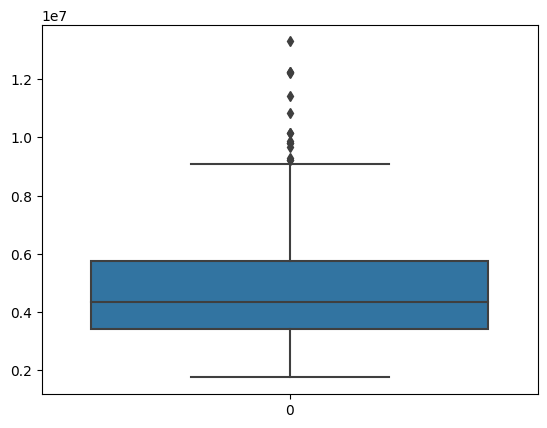

In [34]:
sns.boxplot(data.price)

In [35]:
quant99 = data.price.quantile(0.99)
upper_array = np.where(data.price>quant99)[0]

data.drop(index=upper_array, inplace=True)

In [36]:
data.reset_index(drop = True, inplace=True)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,10150000,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished
1,10150000,16200,5,3,2,yes,no,no,no,no,0,unfurnished
2,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,furnished
3,9800000,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished
4,9800000,13200,3,1,2,yes,no,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
534,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
535,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
536,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
537,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


<Axes: >

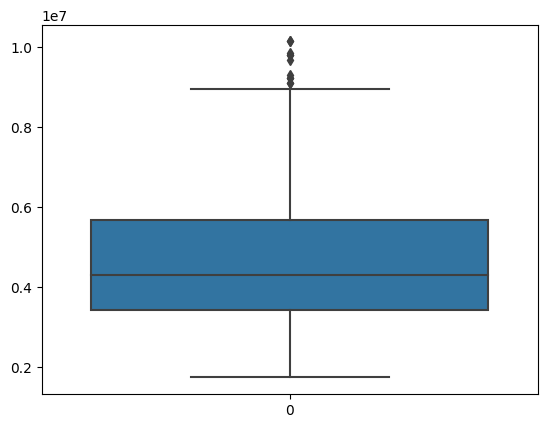

In [37]:
sns.boxplot(data['price'])

In [38]:
data['price']

0      10150000
1      10150000
2       9870000
3       9800000
4       9800000
         ...   
534     1820000
535     1767150
536     1750000
537     1750000
538     1750000
Name: price, Length: 539, dtype: int64

### 7. Check for Categorical columns and perform encoding

Encoding techniques

Label encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,10150000,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished
1,10150000,16200,5,3,2,yes,no,no,no,no,0,unfurnished
2,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,furnished
3,9800000,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished
4,9800000,13200,3,1,2,yes,no,yes,no,yes,2,furnished


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             539 non-null    int64 
 1   area              539 non-null    int64 
 2   bedrooms          539 non-null    int64 
 3   bathrooms         539 non-null    int64 
 4   stories           539 non-null    int64 
 5   mainroad          539 non-null    object
 6   guestroom         539 non-null    object
 7   basement          539 non-null    object
 8   hotwaterheating   539 non-null    object
 9   airconditioning   539 non-null    object
 10  parking           539 non-null    int64 
 11  furnishingstatus  539 non-null    object
dtypes: int64(6), object(6)
memory usage: 50.7+ KB


In [43]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
for col in columns:
 data[col] = le.fit_transform(data[col])

In [44]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,10150000,8580,4,3,4,1,0,0,0,1,2,semi-furnished
1,10150000,16200,5,3,2,1,0,0,0,0,0,unfurnished
2,9870000,8100,4,1,2,1,1,1,0,1,2,furnished
3,9800000,5750,3,2,4,1,1,0,0,1,1,unfurnished
4,9800000,13200,3,1,2,1,0,1,0,1,2,furnished


### One Hot Encoding

In [45]:
data = pd.get_dummies(data, columns=['furnishingstatus'])

In [46]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,10150000,8580,4,3,4,1,0,0,0,1,2,0,1,0
1,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,1
2,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0
3,9800000,5750,3,2,4,1,1,0,0,1,1,0,0,1
4,9800000,13200,3,1,2,1,0,1,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
535,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
536,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
537,1750000,2910,3,1,1,0,0,0,0,0,0,1,0,0


8. Split the data into dependent and independent variables.

Dependent variable

In [47]:
y = data.loc[:, 'price':'price']
y

,price
0,10150000
1,10150000
2,9870000
3,9800000
4,9800000
...,...
534,1820000
535,1767150
536,1750000
537,1750000


Independent variable

In [48]:
X = data.drop(columns=['price'], axis=1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8580,4,3,4,1,0,0,0,1,2,0,1,0
1,16200,5,3,2,1,0,0,0,0,0,0,0,1
2,8100,4,1,2,1,1,1,0,1,2,1,0,0
3,5750,3,2,4,1,1,0,0,1,1,0,0,1
4,13200,3,1,2,1,0,1,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,3000,2,1,1,1,0,1,0,0,2,0,0,1
535,2400,3,1,1,0,0,0,0,0,0,0,1,0
536,3620,2,1,1,1,0,0,0,0,0,0,0,1
537,2910,3,1,1,0,0,0,0,0,0,1,0,0


### 9. Scale the independent variables

Scaling

StandardScaler --> mean=0 std=1

MinMaxScaler --> scale between 0 to 1

In [49]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [50]:
name = X.columns
X_scaled = scale.fit_transform(X)

In [51]:
X_scaled

array([[0.47628866, 0.6       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.8       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.44329897, 0.6       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [52]:
X = pd.DataFrame(X_scaled, columns=name)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.476289,0.6,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0,0.0
1,1.000000,0.8,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
2,0.443299,0.6,0.0,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.0,0.0
3,0.281787,0.4,0.5,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.0,1.0
4,0.793814,0.4,0.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0.092784,0.2,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.0
535,0.051546,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
536,0.135395,0.2,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
537,0.086598,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0


### 10. Split the data into training and testing

Train-Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
470,0.288660,0.4,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.333333,0.0,0.0,1.0
208,0.185567,0.2,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0
250,0.161512,0.4,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,0.0
157,0.355670,0.4,0.0,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,1.0,0.0
118,0.335052,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.327835,0.4,0.5,0.666667,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0
277,0.186254,0.6,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0
9,0.298969,0.6,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0,0.0
359,0.261168,0.2,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0


In [56]:
y_train

,price
470,2940000
208,4865000
250,4480000
157,5425000
118,5950000
...,...
70,6650000
277,4270000
9,9100000
359,3703000


In [57]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
172,0.373540,0.4,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,0.0,1.0,0.0
469,0.092784,0.2,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
196,0.169759,0.2,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.333333,0.0,1.0,0.0
417,0.144330,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
535,0.051546,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.079038,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
225,0.183505,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
337,0.167010,0.2,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
318,0.195876,0.4,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,1.0,0.0


In [58]:
y_test

,price
172,5229000
469,2961000
196,4900000
417,3360000
535,1767150
...,...
494,2660000
225,4690000
337,3850000
318,4007500


### 11. Build the Model

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

### 12. Train the Model

In [60]:
#train the model
lr.fit(X_train,y_train)

LinearRegression()

13.Test the Model

In [61]:
#test the model 
y_pred=lr.predict(X_test)

In [62]:
y_pred #prediction

array([[5292032.],
       [3473408.],
       [3915776.],
       [2867200.],
       [2359296.],
       [4194304.],
       [2834432.],
       [4620288.],
       [4734976.],
       [5341184.],
       [4702208.],
       [6619136.],
       [2277376.],
       [3719168.],
       [5062656.],
       [4046848.],
       [2801664.],
       [2818048.],
       [3260416.],
       [5259264.],
       [5013504.],
       [3915776.],
       [6553600.],
       [2818048.],
       [5767168.],
       [3244032.],
       [3555328.],
       [3866624.],
       [6062080.],
       [6651904.],
       [6012928.],
       [5668864.],
       [5718016.],
       [3194880.],
       [6668288.],
       [4407296.],
       [2719744.],
       [4882432.],
       [4341760.],
       [4358144.],
       [6307840.],
       [3637248.],
       [4767744.],
       [5062656.],
       [6373376.],
       [2621440.],
       [6045696.],
       [5505024.],
       [3801088.],
       [6111232.],
       [3424256.],
       [5537792.],
       [7618

In [63]:
y_test # Actual outcome

,price
172,5229000
469,2961000
196,4900000
417,3360000
535,1767150
...,...
494,2660000
225,4690000
337,3850000
318,4007500


### 14. Measure the performance using Metrics.

In [64]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

Error

In [65]:
error=y_test-y_pred

In [66]:
error

,price
172,-63032.0
469,-512408.0
196,984224.0
417,492800.0
535,-592146.0
...,...
494,22176.0
225,1265744.0
337,589584.0
318,-743860.0


Square error

In [67]:
se=error*error

In [68]:
se

,price
172,3.973033e+09
469,2.625620e+11
196,9.686969e+11
417,2.428518e+11
535,3.506369e+11
...,...
494,4.917750e+08
225,1.602108e+12
337,3.476093e+11
318,5.533277e+11


Mean square error

In [69]:
mse=np.mean(se)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [70]:
mse

price    9.902522e+11
dtype: float64

In [71]:
mse2=mean_squared_error(y_test,y_pred)

In [72]:
mse2

990252212649.3704

Mean Absolute Error

In [73]:
mae=mean_absolute_error(y_test,y_pred)

In [74]:
mae

778780.9444444445

In [75]:
rmse=np.sqrt(mse2)

In [76]:
rmse

995114.1706605179

R2 Score

In [77]:
acc=r2_score(y_pred,y_test)
acc

0.49589197394008533